# Ejercicio integrador / Mineria de Datos / Semana 05

<h4><strong>Estudiante:</strong> Pablo Jusim</h4>

<strong>Negocio:</strong> Empresa de análisis financiero.  

<strong>DataSet:</strong> Información de clientes bancarios.  

<strong>Objetivo:</strong> es preparar los datos para un modelo de predicción de solvencia financiera.

### Importaciones

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

### Carga (creación) de data set

In [2]:
df = pd.DataFrame({
"Cliente": [1, 2, 3, 4, 5, 6, 7, 8],
"Edad": [25, 40, 35, 50, 30, 45, 38, 29],
"Ingresos": [50000, 60000, 70000, 80000, 45000, 85000, 72000, 48000],
"Historial_Pagos": ["Bueno", "Regular", "Malo", "Bueno", "Regular", "Malo", "Bueno", "Regular"],
"Categoría": ["A", "B", "C", "A", "B", "C", "A", "B"]
})
df.head()

,Cliente,Edad,Ingresos,Historial_Pagos,Categoría
0,1,25,50000,Bueno,A
1,2,40,60000,Regular,B
2,3,35,70000,Malo,C
3,4,50,80000,Bueno,A
4,5,30,45000,Regular,B


### PreProcesamiento de datos

#### Limpieza de datos

##### Datos nulos

In [6]:
# Ver cantidad de valores nulos por columna
print("Valores nulos por columna:\n", df.isnull().sum())

Valores nulos por columna:
 Cliente            0
Edad               0
Ingresos           0
Historial_Pagos    0
Categoría          0
dtype: int64


In [8]:
# Reemplazo de valores nulos por la media de la columna "Edad"
mode_value = df["Edad"].median()
df.loc[:, "Edad"] = df["Edad"].fillna(mode_value)
# Estas líneas no harán nada ya que no hay valores nulos en el DataFrame

##### Outliyers

In [ ]:
# 1️ Cálculo del IQR de ingresos
Q1 = df["Ingresos"].quantile(0.25)
Q3 = df["Ingresos"].quantile(0.75)
IQR = Q3 - Q1

# 2️ Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# 3️ Filtrar valores dentro de los límites
df_cleaned = df[(df["Ingresos"] >= limite_inferior) & (df["Ingresos"] <= limite_superior)]
print(f'Datos eliminados: {df.size - df_cleaned.size}')

# No se encontraron outliers en la columna "Ingresos" en este caso,
# ya que todos los valores están dentro de los límites definidos por el IQR.

Datos eliminados: 0


#### Transformación de datos numéricos

##### Normalizar Ingresos

In [12]:
scaler = MinMaxScaler()
df_cleaned["Ingreso_normalizado"] = scaler.fit_transform(df_cleaned[["Ingresos"]])

##### Estandarizar edad

In [13]:
# Estandarizar Edad con Z-score Scaling
scaler = StandardScaler()
df_cleaned["Edad_estandarizada"] = scaler.fit_transform(df_cleaned[["Edad"]])
df_cleaned.head()

,Cliente,Edad,Ingresos,Historial_Pagos,Categoría,Ingreso_normalizado,Edad_estandarizada
0,1,25,50000,Bueno,A,0.125,-1.451747
1,2,40,60000,Regular,B,0.375,0.441836
2,3,35,70000,Malo,C,0.625,-0.189358
3,4,50,80000,Bueno,A,0.875,1.704225
4,5,30,45000,Regular,B,0.000,-0.820553


#### Transformación de datos categóricos

##### Aplicar One-Hot Encoding a la columna Historial de Pagos.

In [14]:
df_encod = pd.get_dummies(df_cleaned, columns=["Historial_Pagos"], prefix="H_pagos")

##### Aplicar Label Encoding a la columna Categoría.

In [15]:
# Aplicar Label Encoding a la columna Categoría
le = LabelEncoder()
df_encod["Categoría"] = le.fit_transform(df_encod["Categoría"])
df_encod.head()

,Cliente,Edad,Ingresos,Categoría,Ingreso_normalizado,Edad_estandarizada,H_pagos_Bueno,H_pagos_Malo,H_pagos_Regular
0,1,25,50000,0,0.125,-1.451747,True,False,False
1,2,40,60000,1,0.375,0.441836,False,False,True
2,3,35,70000,2,0.625,-0.189358,False,True,False
3,4,50,80000,0,0.875,1.704225,True,False,False
4,5,30,45000,1,0.000,-0.820553,False,False,True


Text(0, 0.5, 'Ingreso Normalizado')

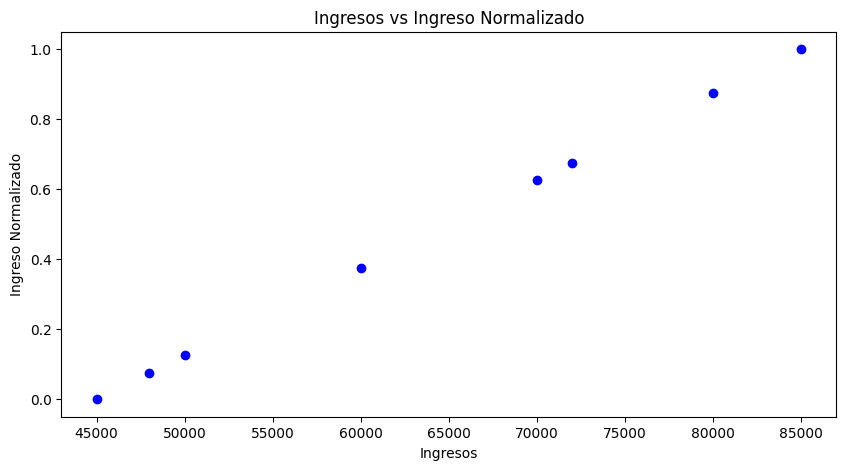

In [18]:
# Graficar Ingresos vs ingresos normalizados
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned["Ingresos"], df_cleaned["Ingreso_normalizado"], color='blue', label='Ingreso Normalizado')
plt.title('Ingresos vs Ingreso Normalizado')
plt.xlabel('Ingresos')
plt.ylabel('Ingreso Normalizado')

# Se ve que la normalización ha llevado los ingresos a un rango entre 0 y 1 sin afectar la distribución de los datos.

## 4️. Interacción con una Herramienta de IA (LLM)

<h5><strong>IA:</strong></h5>Copilot

<h5><strong>Pregunta:</strong></h5> Quiero que me recomiendes métodos avanzados de imputación de datos para conjuntos de datos con muchas variables numéricas y categóricas

<h5><strong>Respuesta textual:</strong></h5>

1. **Imputación múltiple por ecuaciones encadenadas (MICE):** Este método crea múltiples conjuntos de datos imputados y combina los resultados para reflejar la incertidumbre en los valores imputados. Es útil para datos tanto numéricos como categóricos
2. **Modelos basados en árboles (como Random Forest):** Utilizan algoritmos de aprendizaje automático para predecir valores faltantes basándose en otras variables del conjunto de datos. Son efectivos para datos mixtos.
3. **Imputación basada en K-vecinos más cercanos (KNN):** Este método encuentra los K registros más similares y utiliza sus valores para imputar los datos faltantes. Funciona bien con datos categóricos y numéricos.
4. **Imputación por regresión:** Se ajusta un modelo de regresión para predecir los valores faltantes de una variable utilizando otras variables como predictores. Es más adecuado para datos numéricos.
5. **Autoencoders (Redes Neuronales):** Utilizan redes neuronales para aprender representaciones comprimidas de los datos y reconstruir valores faltantes. Son ideales para conjuntos de datos grandes y complejos.
6. **Modelos bayesianos:** Incorporan incertidumbre en la imputación y son útiles para datos con distribuciones complejas.


<h5><strong>Reflexión:</strong></h5>
Si bien en el pdf de la clase se mencionan varias formas de imputación de datos faltantes, solo se trabaja con los más sencillos, ninguno de los cuales es mencionado por la IA. Los métodos de árboles y vecino más cercano fueron vistos en otra materia y podrían aplicarse en un dataset real.  
Todas las propuestas deben adecuarse a su marco de uso pero, en general, permiten que el valor imputado sea más preciso que simplemente utilizar un valor fijo como la mediana o la moda.